In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [22]:
df = pd.read_csv('heartdisease.csv')
df.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [23]:
print("no of patients: " + str(len(df.index)))

no of patients: 4238


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


array([[<AxesSubplot:title={'center':'totChol'}>]], dtype=object)

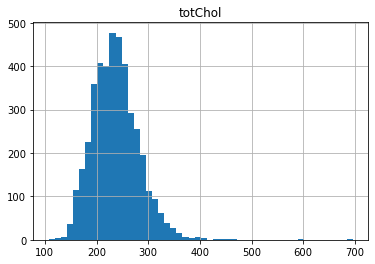

In [25]:
df.hist(column= 'totChol', bins = 50)

array([[<AxesSubplot:title={'center':'diabetes'}>]], dtype=object)

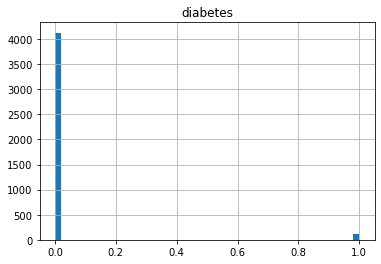

In [26]:
df.hist(column= 'diabetes', bins = 50)

array([[<AxesSubplot:title={'center':'sysBP'}>]], dtype=object)

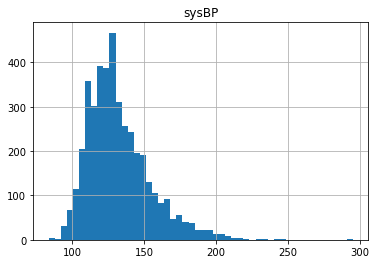

In [27]:
df.hist(column= 'sysBP', bins = 50)

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

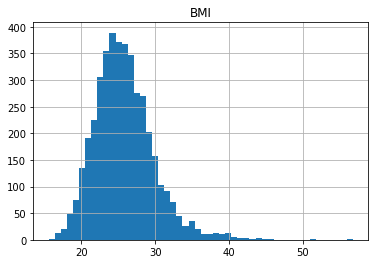

In [28]:
df.hist(column= 'BMI', bins = 50)

array([[<AxesSubplot:title={'center':'heartRate'}>]], dtype=object)

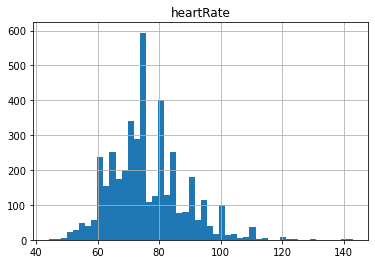

In [29]:
df.hist(column= 'heartRate', bins = 50)

In [30]:
cdf = df[['male', 'age', 'education', 'currentSmoker', 'prevalentHyp', 'totChol', 'sysBP', 'BMI', 'heartRate']]
cdf.dropna(inplace = True)

<ipython-input-30-716ecdd09528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(inplace = True)


In [31]:
x = cdf[['currentSmoker', 'prevalentHyp', 'totChol', 'sysBP', 'BMI', 'heartRate']].values
x

array([[  0.  ,   0.  , 195.  , 106.  ,  26.97,  80.  ],
       [  0.  ,   0.  , 250.  , 121.  ,  28.73,  95.  ],
       [  1.  ,   0.  , 245.  , 127.5 ,  25.34,  75.  ],
       ...,
       [  1.  ,   0.  , 248.  , 131.  ,  22.  ,  84.  ],
       [  1.  ,   0.  , 210.  , 126.5 ,  19.16,  86.  ],
       [  0.  ,   0.  , 269.  , 133.5 ,  21.47,  80.  ]])

In [32]:
y = cdf[['male']]
y

,male
0,1
1,0
2,1
3,0
4,0
...,...
4233,1
4234,1
4235,0
4236,0


In [35]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x

array([[-0.98729176, -0.67125901, -0.94466272, -1.19594635,  0.29370563,
         0.34070829],
       [-0.98729176, -0.67125901,  0.30048896, -0.51397012,  0.72506003,
         1.58418854],
       [ 1.01287182, -0.67125901,  0.18729335, -0.21844708, -0.10578736,
        -0.07378513],
       ...,
       [ 1.01287182, -0.67125901,  0.25521072, -0.0593193 , -0.92438037,
         0.67230302],
       [ 1.01287182, -0.67125901, -0.6050759 , -0.26391217, -1.62042951,
         0.83810039],
       [-0.98729176, -0.67125901,  0.73063226,  0.05434341, -1.05427686,
         0.34070829]])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3252, 6) (3252, 1)
Test set: (814, 6) (814, 1)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [73]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

F:\edit_py\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [74]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [75]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.753690036900369
Test set Accuracy:  0.6375921375921376
